<a href="https://colab.research.google.com/github/marcelambicalho/air_quality_eda/blob/main/EDA_Assignment_Marcela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
### Air Quality Dataset
#### Marcela Marques Bicalho

##### Dataset Information
The dataset used for this analysis, taken from UCI Machine Learning Repository, contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Data were recorded from March 2004 to February 2005 (one year)

*Features Description*

**Date** (DD/MM/YYYY)


**Time** (HH.MM.SS)



**CO(GT)**	hourly averaged concentration CO in mg/m^3

**PT08.S1(CO)**	hourly averaged sensor response (nominally CO targeted)

**NMHC(GT)** hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3

**C6H6(GT)** hourly averaged Benzene concentration in microg/m^3

**PT08.S2(NMHC)**	hourly averaged sensor response (nominally NMHC targeted)

**NOx(GT)** hourly averaged NOx concentration in ppb (reference analyzer)

**PT08.S3(NOx)** 	hourly averaged sensor response (nominally NOx targeted)

**NO2(GT)** hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

**PT08.S4(NO2)** hourly averaged sensor response (nominally NO2 targeted)

**PT08.S5(O3)**	hourly averaged sensor response (nominally O3 targeted)

**T**	Temperature	°C

**RH** Relative Humidity	%

**AH** Absolute Humidity

# Data Cleaning

In [ ]:
# Load Dataset
import pandas as pd

df = pd.read_csv('AirQualityUCI.csv', sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
df.shape

(9471, 17)

Two columns (Unnamed 15 and Unnamed 16) have no values, so we can drop them from the dataset

In [ ]:
df_dropped_columns = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df_dropped_columns.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
df_dropped_columns.shape

(9471, 15)

## Handling Missing Values

In [ ]:
# Check any for missing values
df_nulls = df_dropped_columns.isnull().sum()
df_nulls

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [ ]:
# Total Missing values
df_total_nulls = df_nulls.sum()
print("Total of missing values:", df_total_nulls)

Total of missing values: 1710


In [ ]:
# Remove missing values
df_cleaned = df_dropped_columns.dropna()
df_cleaned.shape

(9357, 15)

In [ ]:
df_cleaned.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [ ]:
df_air = df_cleaned
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


## Data Types Formatting

In [ ]:
# Get the datatypes of all variables
df_air.dtypes

,0
Date,object
Time,object
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


Some of them are set as objects, even though they are numerical variables / other type of variable. Due to this, we should transform the necessary ones from objects to numerical datatypes.

In [ ]:
# CO(GT) to float
df_air['CO(GT)'] = df_air['CO(GT)'].str.replace(',', '.').astype(float)
df_air['CO(GT)'].head()

<ipython-input-51-b385ac999387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['CO(GT)'] = df_air['CO(GT)'].str.replace(',', '.').astype(float)


,CO(GT)
0,2.6
1,2.0
2,2.2
3,2.2
4,1.6


In [ ]:
# C6H6(GT) to float
df_air['C6H6(GT)'] = df_air['C6H6(GT)'].str.replace(',', '.').astype(float)
df_air['C6H6(GT)'].head()

<ipython-input-52-ae803aff36e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['C6H6(GT)'] = df_air['C6H6(GT)'].str.replace(',', '.').astype(float)


,C6H6(GT)
0,11.9
1,9.4
2,9.0
3,9.2
4,6.5


In [ ]:
# T to float
df_air['T'] = df_air['T'].str.replace(',', '.').astype(float)
df_air['T'].head()

<ipython-input-53-731252ba9eaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['T'] = df_air['T'].str.replace(',', '.').astype(float)


,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


In [ ]:
# RH to float
df_air['RH'] = df_air['RH'].str.replace(',', '.').astype(float)
df_air['RH'].head()

<ipython-input-54-bf9fcf665967>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['RH'] = df_air['RH'].str.replace(',', '.').astype(float)


,RH
0,48.9
1,47.7
2,54.0
3,60.0
4,59.6


In [ ]:
# AH to float
df_air['AH'] = df_air['AH'].str.replace(',', '.').astype(float)
df_air['AH'].head()

<ipython-input-55-84f839a8f85b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['AH'] = df_air['AH'].str.replace(',', '.').astype(float)


,AH
0,0.7578
1,0.7255
2,0.7502
3,0.7867
4,0.7888


In [ ]:
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df_air.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


Now we convert more case-sensitive datatypes, such as date and time

In [ ]:
# Data to datetime format
df_air['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df_air['Date'].head()

<ipython-input-58-55928037b988>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


,Date
0,2004-03-10
1,2004-03-10
2,2004-03-10
3,2004-03-10
4,2004-03-10


In [ ]:
# Time to datetime format
df_air['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.time
df_air['Time'].head()

<ipython-input-59-ec6f6739fa29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.time


,Time
0,18:00:00
1,19:00:00
2,20:00:00
3,21:00:00
4,22:00:00


In [ ]:
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df_air.dtypes

,0
Date,datetime64[ns]
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


## Outlier Analysis

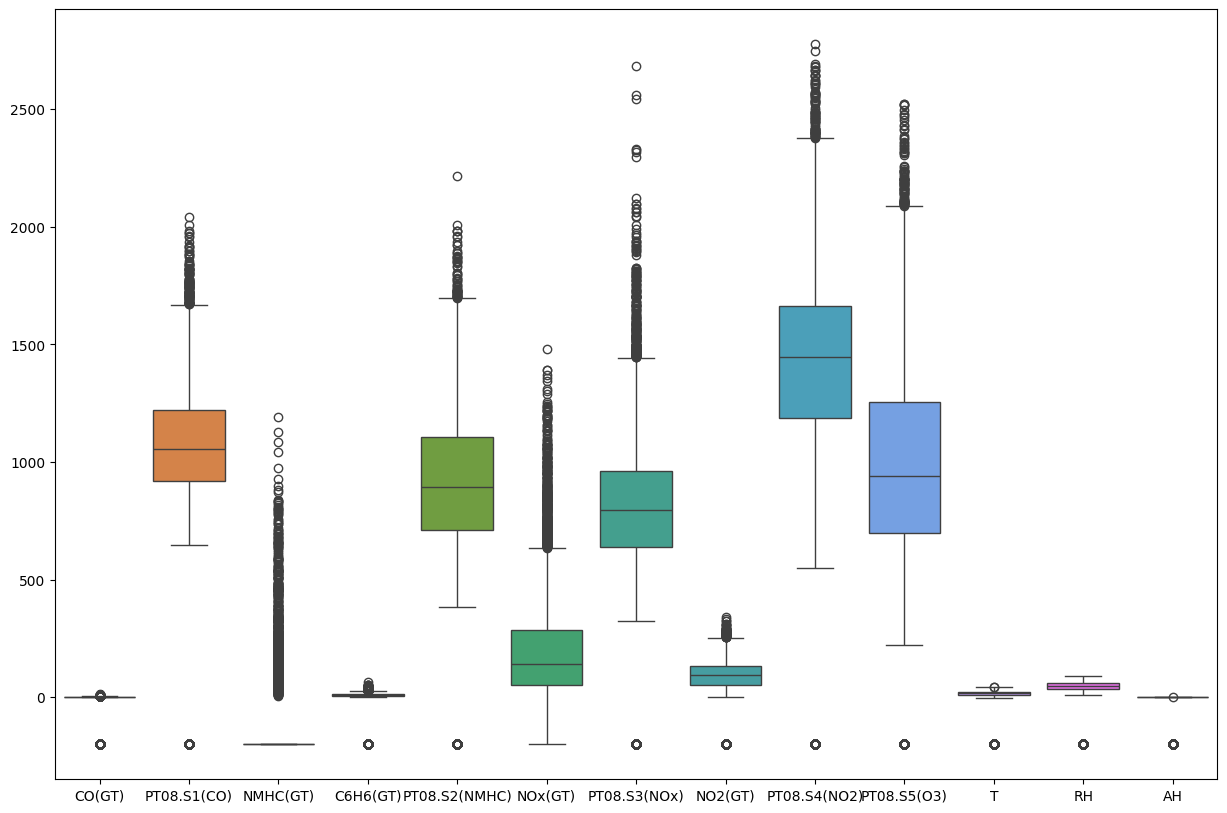

In [ ]:
# Identifying the presence of outliers (extreme values)
from matplotlib import pyplot as plt
import seaborn as sns

# Create boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df_air)
plt.show()

To continue our analysis, we first must keep only numerical features, taking out Date and Time, as analysing their outliers would not be very relevant.

In [ ]:
# Keep only numerical features
import numpy as np

numerical_features = df_air.select_dtypes(include=np.number).columns
df_numerical = df_air[numerical_features]
df_numerical.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Removing

since the boxplot demonstrates a significant number of outliers for different features, let's count how many each feature has:

In [ ]:
# Identify outliers
## Calculating Q1, Q3, and IQR
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Counting outliers
outlier_condition = (df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))
print(outlier_condition.sum())

CO(GT)           1898
PT08.S1(CO)       484
NMHC(GT)          914
C6H6(GT)          606
PT08.S2(NMHC)     426
NOx(GT)           509
PT08.S3(NOx)      602
NO2(GT)          1696
PT08.S4(NO2)      450
PT08.S5(O3)       458
T                 368
RH                366
AH                367
dtype: int64


In [ ]:
df_numerical.shape # current number of values in the data

(9357, 13)

With disproportional amount of outliers in the data, let's remove them based on the IQR (interquartile range):


In [ ]:
# Remove outliers
df_numerical = df_numerical[~((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_numerical.shape # number of values after removing outliers

(5462, 13)

### Standardizing

The boxplot also shows the data ranging from less than 0 to more than 2500,
meaning significanlty higher and lower values affecting the overall data.

To fix this, we can standardize the data, meaning fit all data into a single scale or range

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)
df_scaled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.431780,3.098836,0.0,2.098814,1.869849,0.865951,-0.624593,0.926557,1.803627,2.457478,-0.085173,-0.420866,-0.470876
1,0.840919,2.273021,0.0,0.876200,0.935599,0.021865,0.115308,0.973006,1.030131,1.706557,0.236561,-0.765437,-0.434092
2,0.279438,1.733948,0.0,0.561813,0.668023,-0.336027,0.462297,0.671088,0.763305,1.126165,0.558295,-1.115656,-0.468741
3,0.279438,1.768357,0.0,0.509415,0.613600,-0.484586,0.421475,0.531740,0.718334,0.809043,0.601193,-1.087412,-0.398495
4,0.373018,1.733948,0.0,0.666609,0.754191,-0.565618,0.472502,0.369169,0.754311,0.438071,0.708437,-1.302063,-0.561294


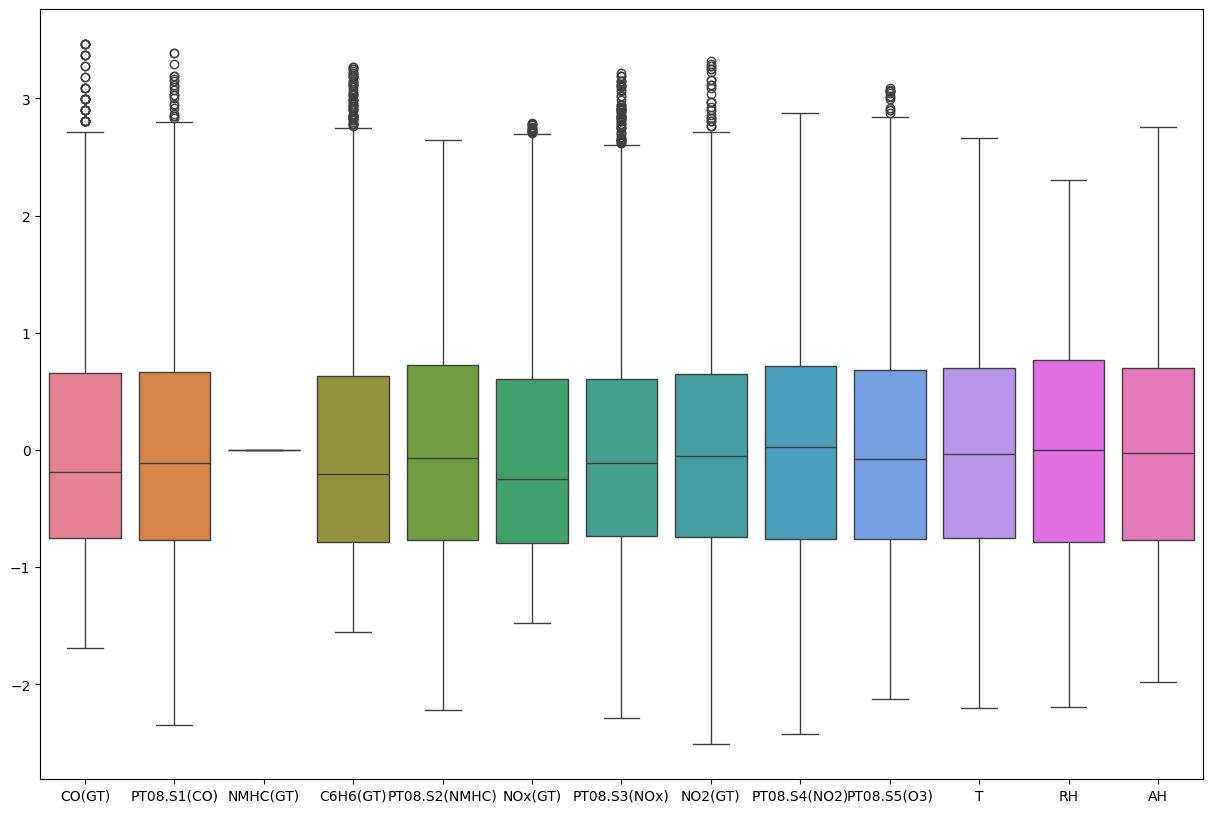

In [ ]:
# Boxplot of standardized data
plt.figure(figsize=(15,10))
sns.boxplot(data=df_scaled)
plt.show()

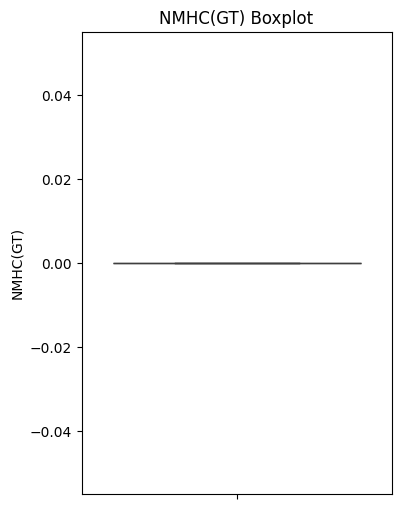

In [ ]:
# NMHC(GT) Boxplot
plt.figure(figsize=(4,6))
sns.boxplot(data=df_scaled['NMHC(GT)'])
plt.title('NMHC(GT) Boxplot')
plt.show()

In [ ]:
df_scaled['NMHC(GT)'].describe()

,NMHC(GT)
count,5462.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Due to NMHC(GT) having a range of values going from -200 to more than 1000, the data can be seen as unreliable for the analysis, due to the fact that we cannot have negative concentrations of gas in an atmosphere.

Therefore, the standardization reduced the valus of the variable to 0, and we can remove the column .

In [ ]:
# Drop NMHC(GT)
df_scaled = df_scaled.drop('NMHC(GT)', axis=1)
df_scaled.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.431780,3.098836,2.098814,1.869849,0.865951,-0.624593,0.926557,1.803627,2.457478,-0.085173,-0.420866,-0.470876
1,0.840919,2.273021,0.876200,0.935599,0.021865,0.115308,0.973006,1.030131,1.706557,0.236561,-0.765437,-0.434092
2,0.279438,1.733948,0.561813,0.668023,-0.336027,0.462297,0.671088,0.763305,1.126165,0.558295,-1.115656,-0.468741
3,0.279438,1.768357,0.509415,0.613600,-0.484586,0.421475,0.531740,0.718334,0.809043,0.601193,-1.087412,-0.398495
4,0.373018,1.733948,0.666609,0.754191,-0.565618,0.472502,0.369169,0.754311,0.438071,0.708437,-1.302063,-0.561294


# EDA

## Univariate Analysis

Now that we have all of our variables cleaned and organised, we can evaluate
them effectively. First, we visualise the distribution of data on each variable, not scaled:

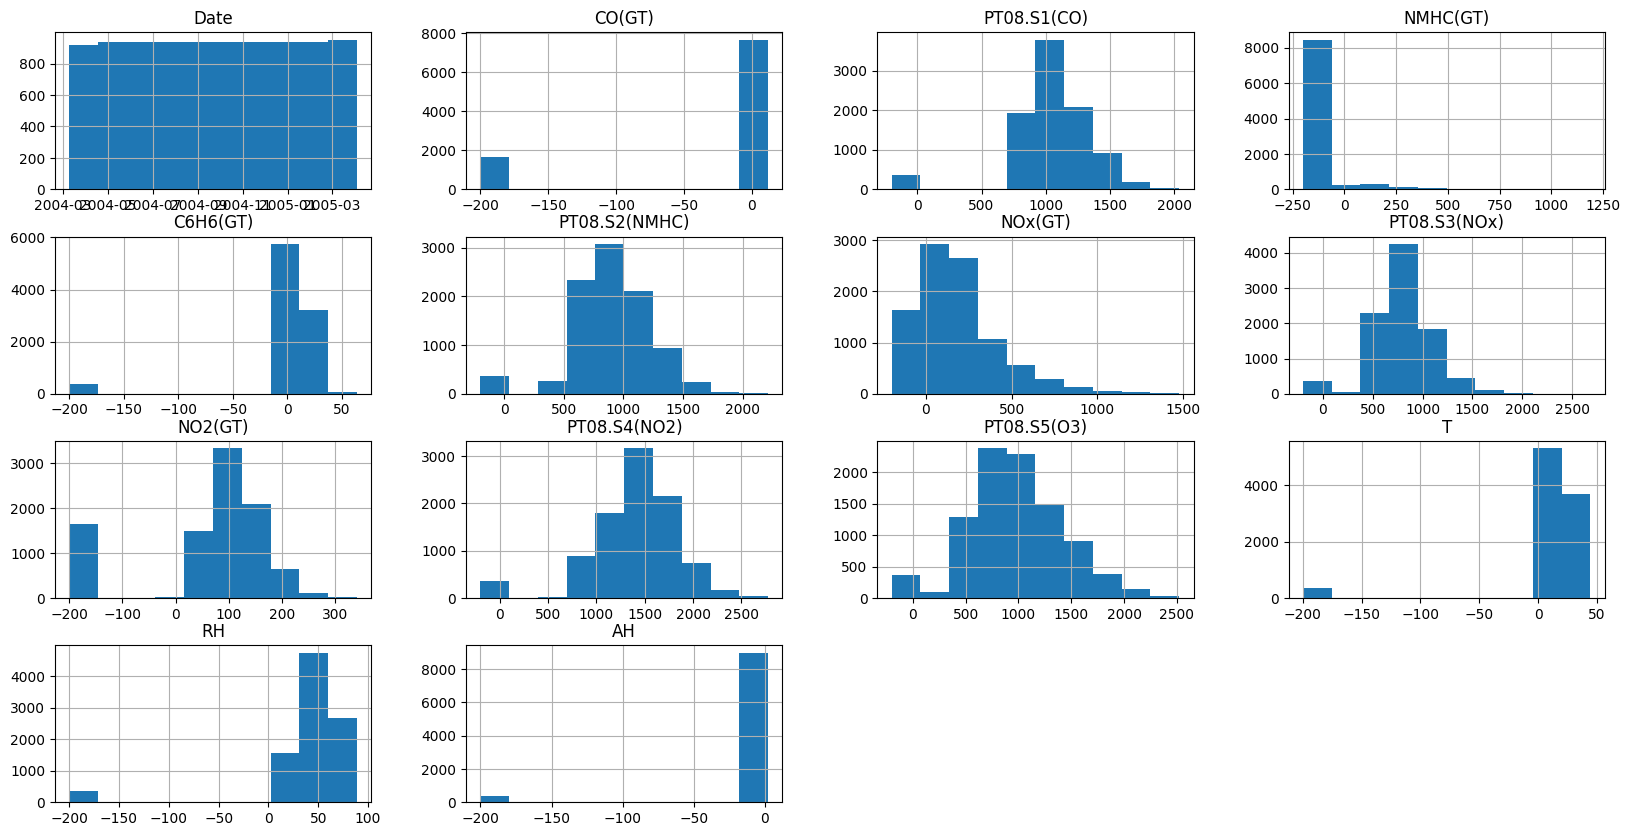

In [ ]:
# Variables Histograms, not scaled
df_air.hist(figsize=(20,10))
plt.show()

And once we scailed and took out date and time variables:

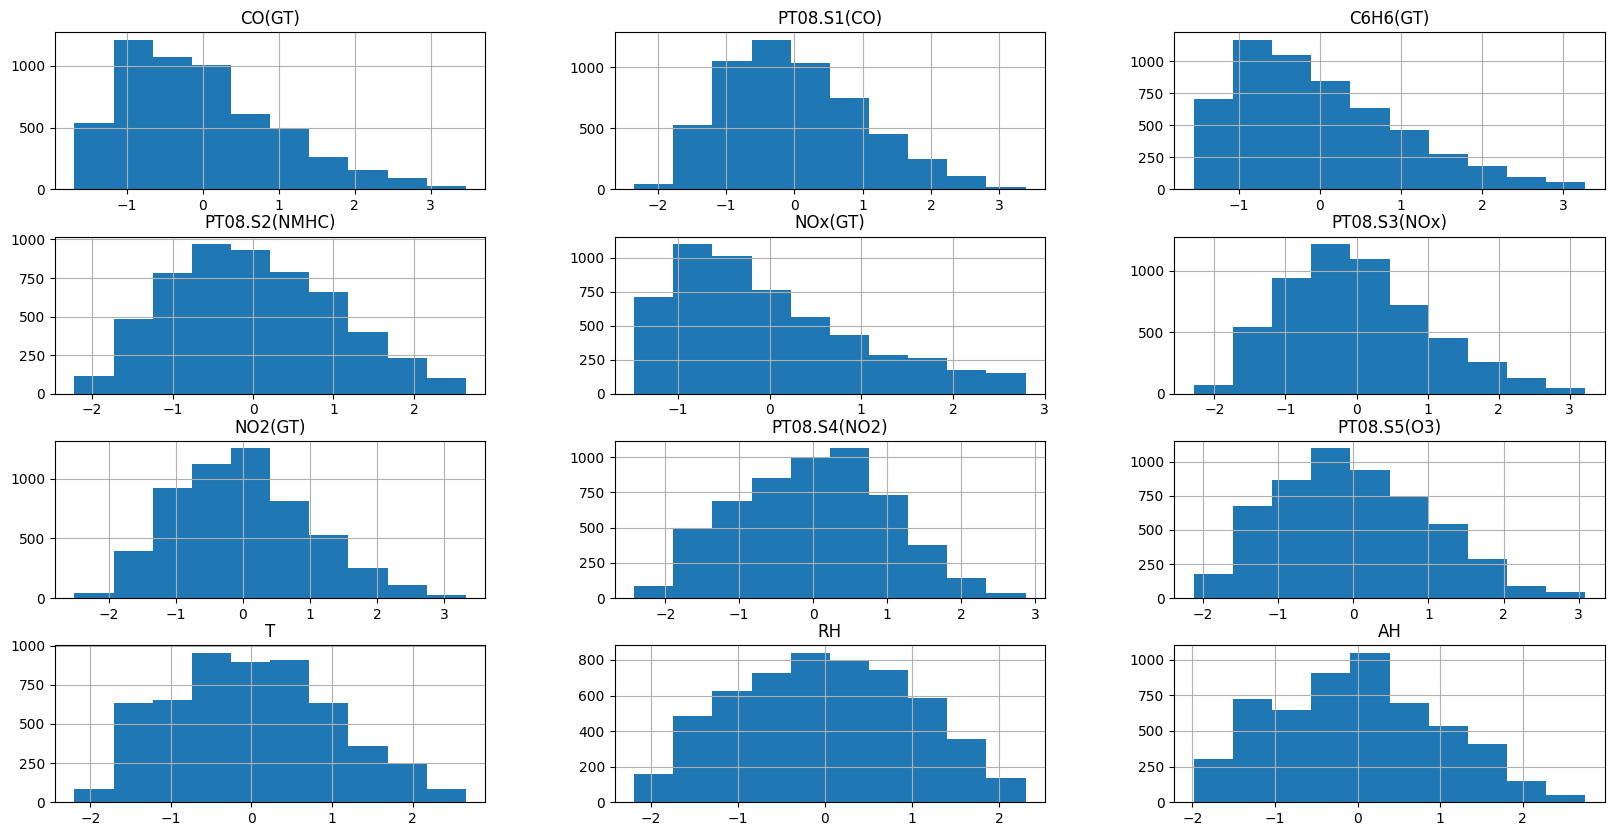

In [ ]:
# Histograms on numerical, scaled variables:
df_scaled.hist(figsize=(20,10))
plt.show()

The histograms demonstrate a fair amount of normally distributed data, made especially due to the standardization process made.

However, there is still presence of some skewed data in the gases CO(GT), C6H6(GT) and NOx(GT). This shows how these certain gases seem to have higher concentration than average.

This can be explained by various factors such as industrial gas emissions, meteorological conditions or urban pollution. Further research needs to be made in order to identify the exact cause.

## Bivariate Analysis

In order to effectively analize how these variables behave, we also have to analyze their relationships with each other.

To do that, we can visualize those different relationships through a Correlation Matrix.

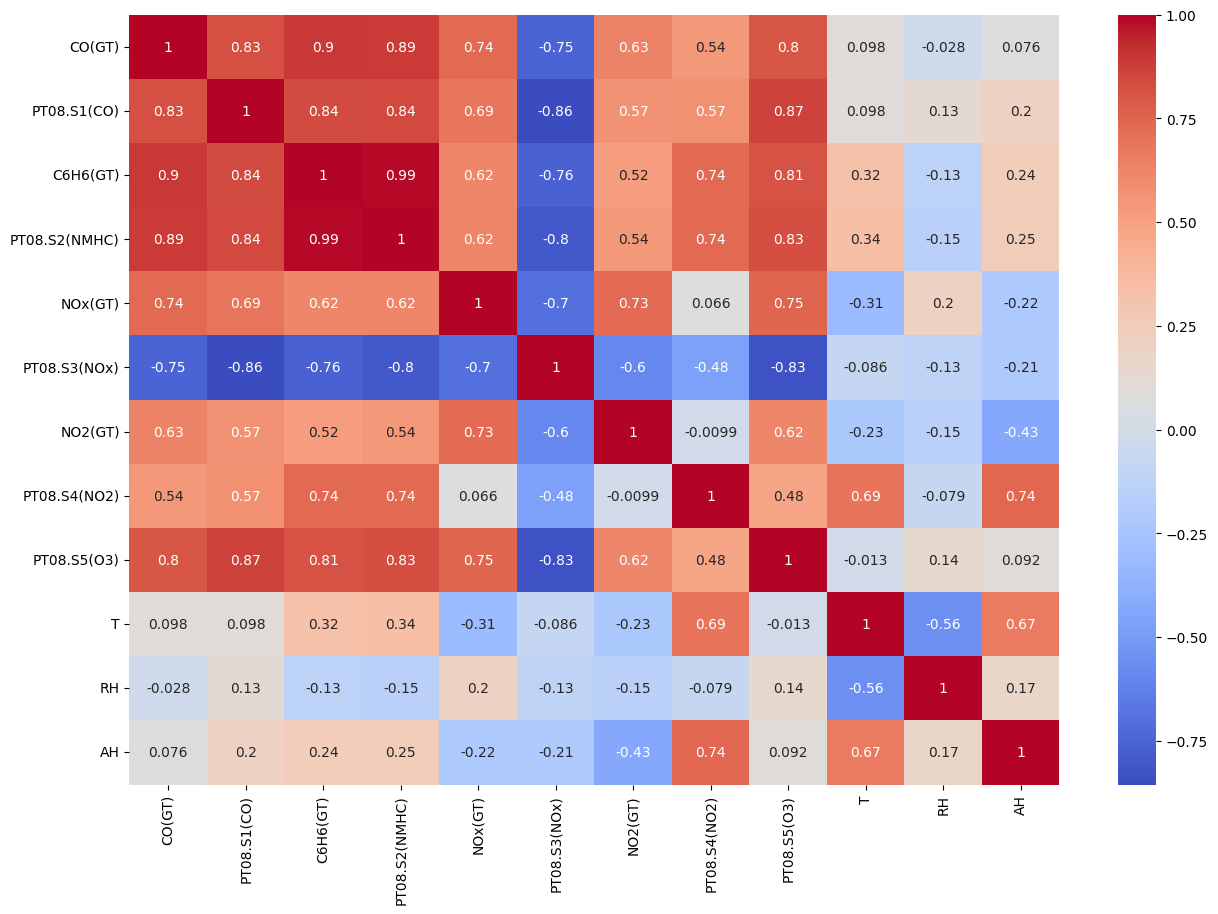

In [ ]:
# Correlation Matrix
corr_matrix = df_scaled.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

There seems to be higher correlation between the first 4 variables. this indicates a direct relationship where, as one gas / gas sensor increases, the other increases as well. This is an expected relationship considering the dataset's context of having one gas and its corresponding sensor.

However, there is still presence of direct(positive) correlation of sensors with different gases, as well as of gases who do not correlate well with their own sensors (negative). These relationships need to be further explored to be understood.


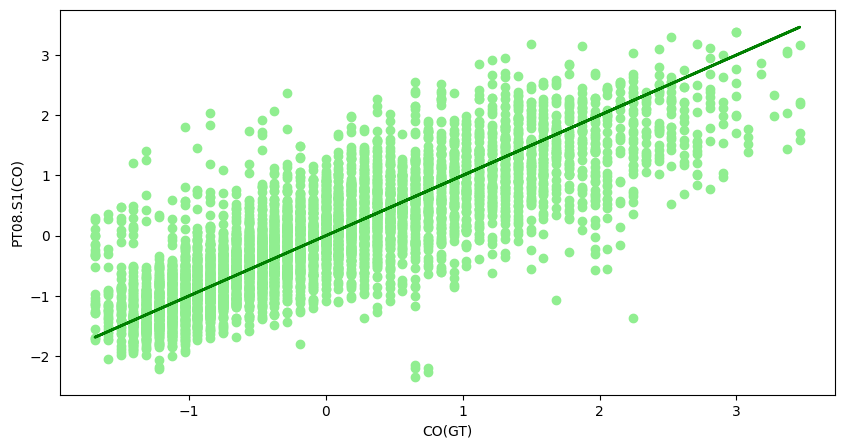

In [ ]:
# Let's see the relationship between the gases and their sensors

# CO(GT) and PT08.S1(CO)
plt.figure(figsize=(10,5))
plt.scatter(df_scaled['CO(GT)'], df_scaled['PT08.S1(CO)'], color='lightgreen')
plt.plot(df_scaled['CO(GT)'], df_scaled['CO(GT)'], color='green', linewidth=2)
plt.xlabel('CO(GT)')
plt.ylabel('PT08.S1(CO)')
plt.show()

The gas concentration can be easily explained by the sensor, being that the sensor's responses increase with the increase in the gas

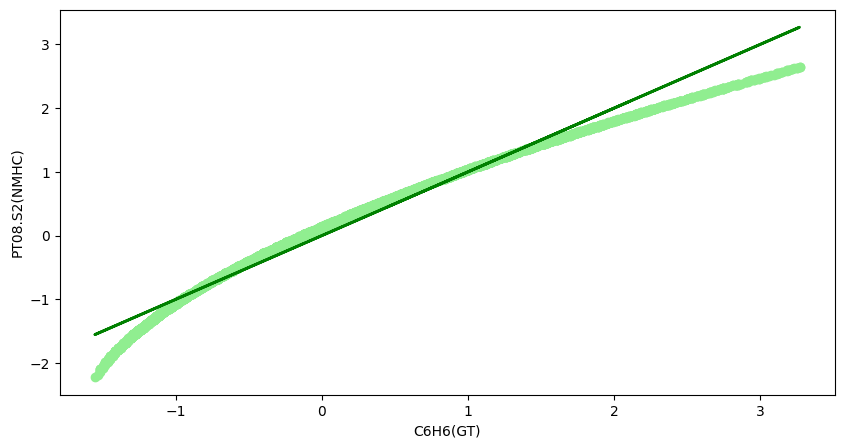

In [ ]:
# C6H6(GT) vs PT08.S2(NMHC)
plt.figure(figsize=(10,5))
plt.scatter(df_scaled['C6H6(GT)'], df_scaled['PT08.S2(NMHC)'], color='lightgreen')
plt.plot(df_scaled['C6H6(GT)'], df_scaled['C6H6(GT)'], color='green', linewidth=2)
plt.xlabel('C6H6(GT)')
plt.ylabel('PT08.S2(NMHC)')
plt.show()

Even though the sensor is initially to be used for NMHC(GT) gas, it is highly correlated to the C6H6(GT) gas, meaning that the sensor can easily detect it as well.

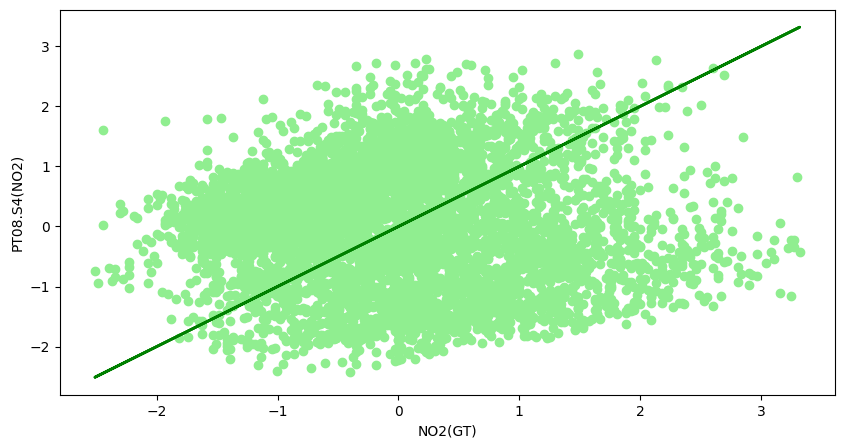

In [ ]:
# NO2 vs PT08.S4(N02)
plt.figure(figsize=(10,5))
plt.scatter(df_scaled['NO2(GT)'], df_scaled['PT08.S4(NO2)'], color='lightgreen')
plt.plot(df_scaled['NO2(GT)'], df_scaled['NO2(GT)'], color='green', linewidth=2)
plt.xlabel('NO2(GT)')
plt.ylabel('PT08.S4(NO2)')
plt.show()

In this case, we can confirm that the sensor for the NO2 gas is not appropriate or fuctioning corrently for its corresponding gas, as they have a negative correlation.

Now, we can evaluate the concentration of the variables over Date and Time

In [ ]:
# Re-add Date and Time to scaled data
df_scaled['Date'] = df_air['Date']
df_scaled['Time'] = df_air['Time']
df_scaled.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date,Time
0,2.431780,3.098836,2.098814,1.869849,0.865951,-0.624593,0.926557,1.803627,2.457478,-0.085173,-0.420866,-0.470876,2004-03-10,18:00:00
1,0.840919,2.273021,0.876200,0.935599,0.021865,0.115308,0.973006,1.030131,1.706557,0.236561,-0.765437,-0.434092,2004-03-10,19:00:00
2,0.279438,1.733948,0.561813,0.668023,-0.336027,0.462297,0.671088,0.763305,1.126165,0.558295,-1.115656,-0.468741,2004-03-10,20:00:00
3,0.279438,1.768357,0.509415,0.613600,-0.484586,0.421475,0.531740,0.718334,0.809043,0.601193,-1.087412,-0.398495,2004-03-10,21:00:00
4,0.373018,1.733948,0.666609,0.754191,-0.565618,0.472502,0.369169,0.754311,0.438071,0.708437,-1.302063,-0.561294,2004-03-10,22:00:00


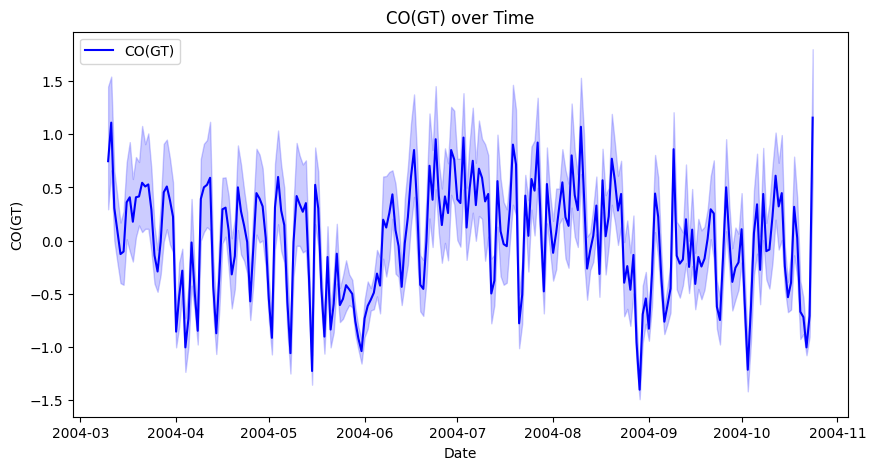

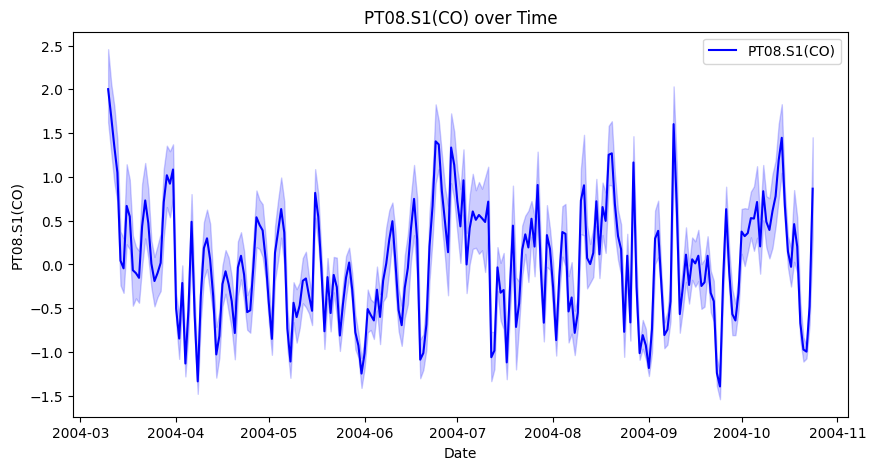

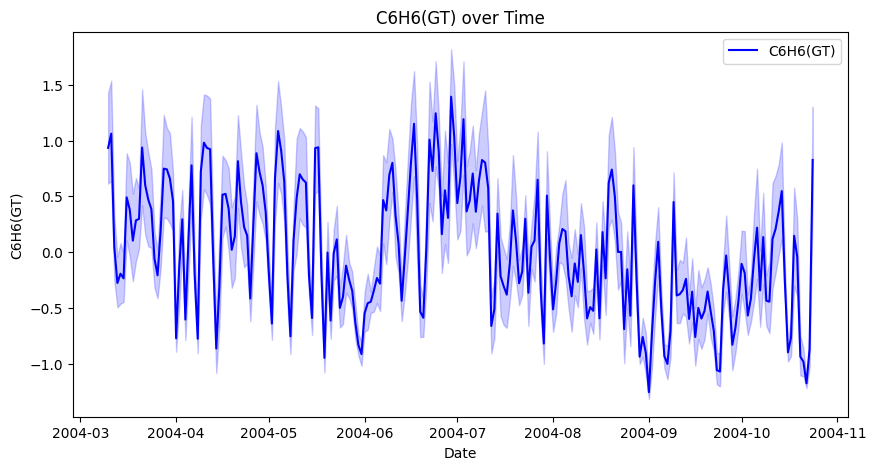

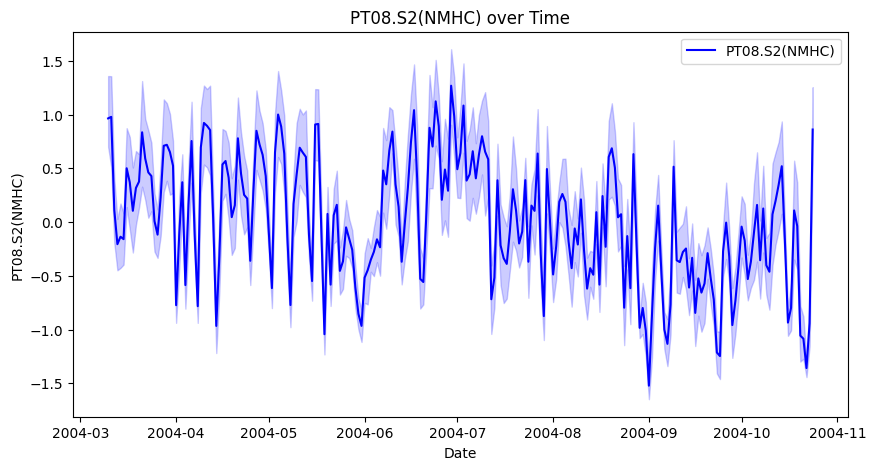

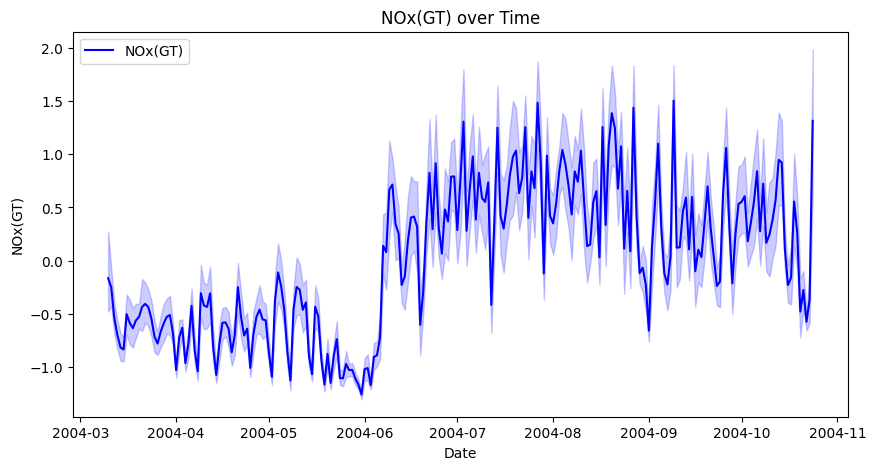

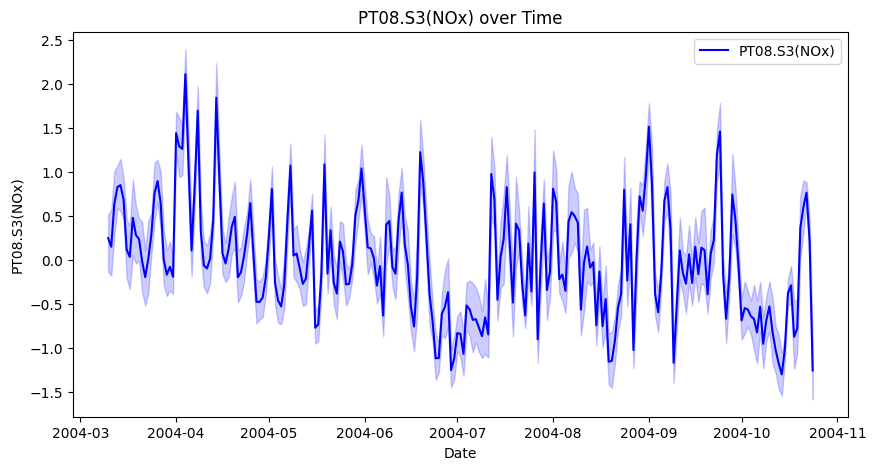

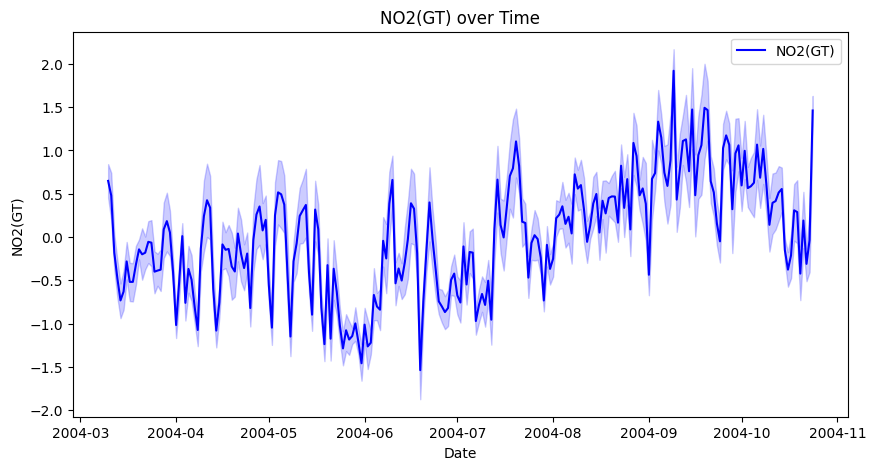

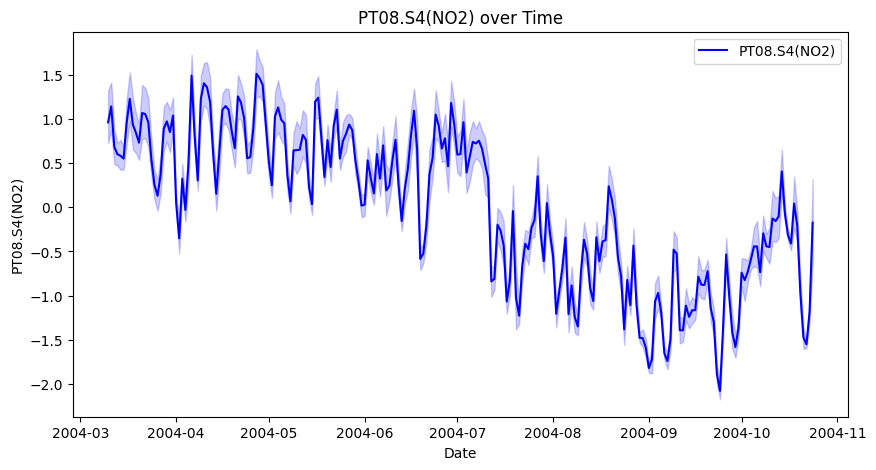

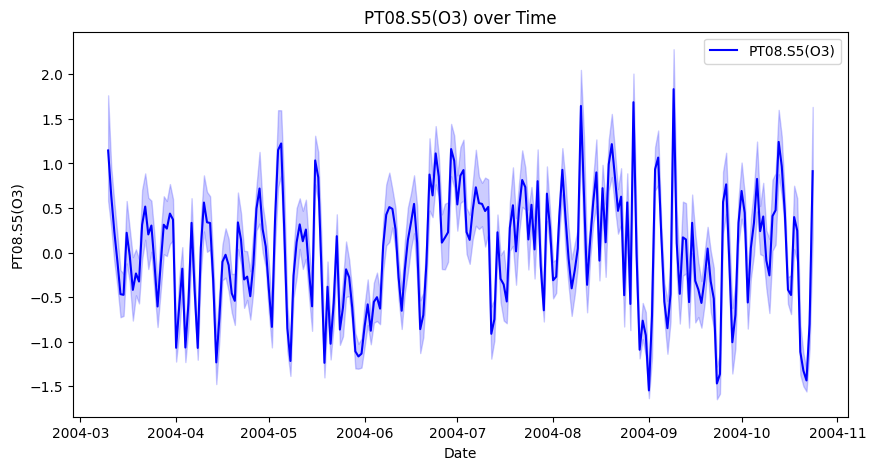

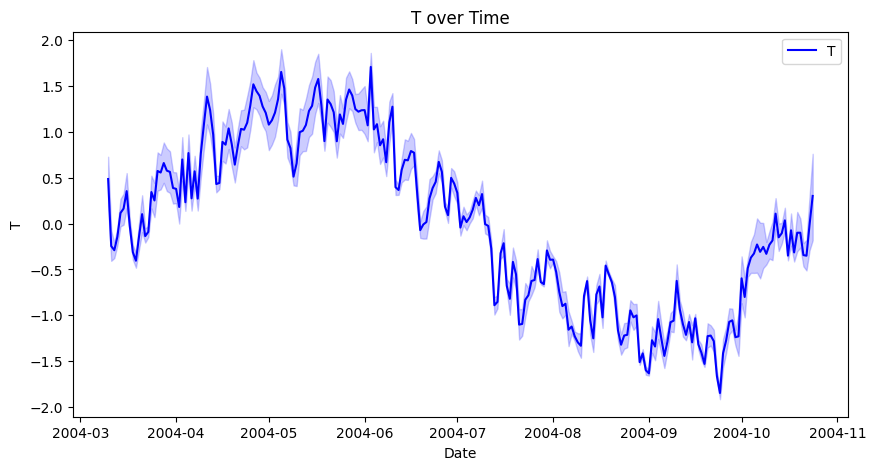

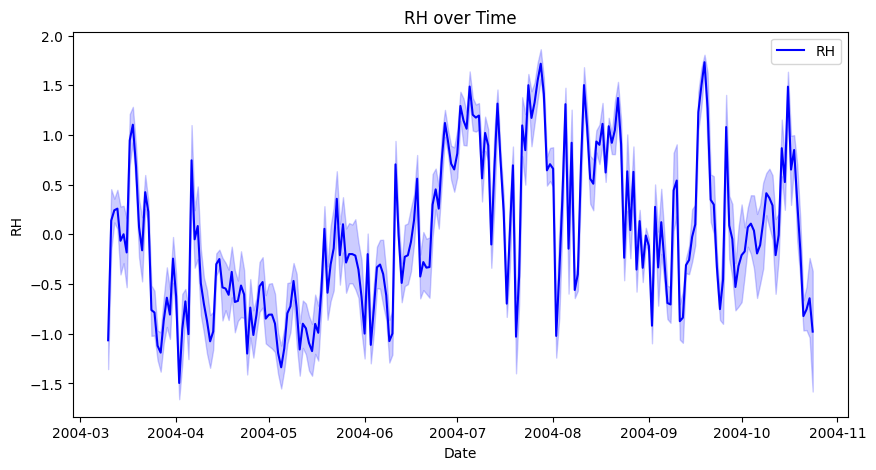

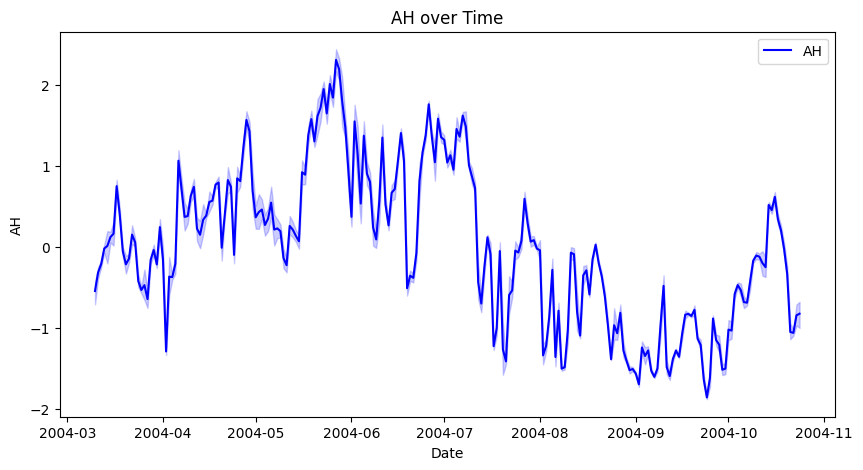

In [ ]:
# Plot all gasses and sensors with Date and Time
import matplotlib.pyplot as plt
import seaborn as sns

# Create plots

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CO(GT)', data=df_scaled, color='blue', label='CO(GT)')
plt.title('CO(GT) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='PT08.S1(CO)', data=df_scaled, color='blue', label='PT08.S1(CO)')
plt.title('PT08.S1(CO) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='C6H6(GT)', data=df_scaled, color='blue', label='C6H6(GT)')
plt.title('C6H6(GT) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='PT08.S2(NMHC)', data=df_scaled, color='blue', label='PT08.S2(NMHC)')
plt.title('PT08.S2(NMHC) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='NOx(GT)', data=df_scaled, color='blue', label='NOx(GT)')
plt.title('NOx(GT) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='PT08.S3(NOx)', data=df_scaled, color='blue', label='PT08.S3(NOx)')
plt.title('PT08.S3(NOx) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='NO2(GT)', data=df_scaled, color='blue', label='NO2(GT)')
plt.title('NO2(GT) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='PT08.S4(NO2)', data=df_scaled, color='blue', label='PT08.S4(NO2)')
plt.title('PT08.S4(NO2) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='PT08.S5(O3)', data=df_scaled, color='blue', label='PT08.S5(O3)')
plt.title('PT08.S5(O3) over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='T', data=df_scaled, color='blue', label='T')
plt.title('T over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='RH', data=df_scaled, color='blue', label='RH')
plt.title('RH over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='AH', data=df_scaled, color='blue', label='AH')
plt.title('AH over Time')
plt.show()


These demonstrate signiifcant information on the atmosfere's situation throughout the year of 2004. For example, the changes in temperature over the months due to most likely seasonal changes, but also the high levels of humidity throughout the year.

In relation to the gases we can see some, like NOx(GT), that increased significantly at the end of the year, or like CO(GT), that had peaks and declines throughout the months.

These can be analysed along with contextual information about the dataset, such as the levels of urban activity in the italian city analysed, the increase of traffic throughout the year, the industrial activity in certain months, etc.

## Linear Regression

With these analyses, the aim of this Exploratory Data Analysis is to discover whether the data on the gasses and the sensors provided can be related to an increase in temperature.

That is, to discover if the temperature values can be predicted by the values detected by the gas sensors and gas concentration. In order to do that, we can perform different Linear Regression Models.

#### Train / Test Split

First, we run a model on all the features that we currently have. In order to run this model, we split the data into training and testing sets, to train the model on the data provided and use the rest to test its accuracy.

In [ ]:
# remove date and time from the dataframe
df_scaled = df_scaled.drop(['DateTime'], axis=1)

In [ ]:
# Split the data into training and testing sets (80:20 proportion) for the model
from sklearn.model_selection import train_test_split

X = df_scaled.drop('T', axis=1)
y = df_scaled['T'] # temperature as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# turn X into a dataframe
X_df = pd.DataFrame(X_train, columns=X.columns)
X_df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH
4939,-0.188462,1.051504,0.526881,0.627206,1.325133,-1.349187,1.623293,-0.268023,0.488930,-1.019628,-0.852008
498,-0.094882,0.919603,0.212495,0.346024,-0.835725,-0.042877,-0.536588,0.838256,-0.220106,-1.183440,0.146149
1467,2.806101,0.770497,3.111838,2.550128,0.555327,-1.134871,1.460722,2.049467,1.452262,-1.347252,-0.165924
415,1.028079,1.544698,1.749496,1.620413,-0.538607,-0.548052,0.462067,1.392895,0.584665,-1.550605,-0.284345
2222,-1.030683,-0.949950,-0.783063,-0.760563,-0.795209,0.640894,-1.279773,0.262631,-0.396617,1.081687,1.708647


In [ ]:
# Import linear regression model
from sklearn.linear_model import LinearRegression

# Run linear regression model
reg_first = LinearRegression().fit(X_train, y_train)

# train the model
reg_first.fit(X_train, y_train)

# make predictions on the test set
y_pred = reg_first.predict(X_test)

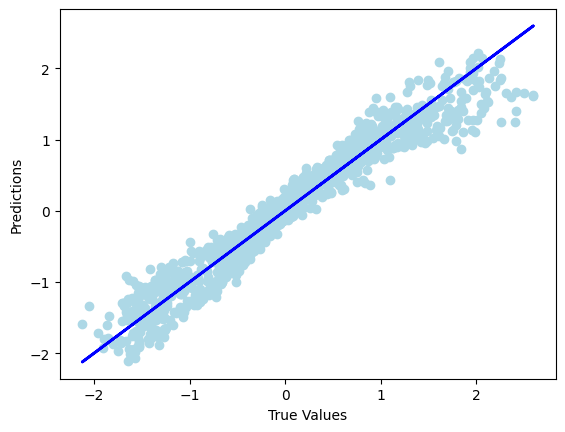

In [ ]:
# do scatter plot
plt.scatter(y_test, y_pred, color='lightblue')
plt.plot(y_test, y_test, color='blue', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# First Linear Regression (No Feature Selection)
from sklearn.metrics import mean_squared_error

accuracy_first = reg_first.score(X_test, y_test)

mse_first = mean_squared_error(y_test, y_pred)

print("Accuracy:", accuracy_first)
print("Mean Squared Error:", mse_first)

Accuracy: 0.9360558098734012
Mean Squared Error: 0.0637619488725343


The model indicates a good level of accuracy, meaning all the other variables seem to fairly explain the target variable (in this case, temperature).

Now, we run different models by performing feature selection. This means evaluating the best variables in the dataset through different methods, and seeing if they perform better in their Linear Regression model.

## Feature Selection

### KBest Method

In [ ]:
# Import KBest
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.linear_model import LinearRegression

# Perform KBest
selector_kbest = SelectKBest(f_classif, k=4)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

# Features selected by KBest
selected_features = selector_kbest.get_support()
selected_feature_names = X.columns[selected_features]
print("Selected features from KBest:", list(selected_feature_names))


Selected features from KBest: ['NO2(GT)', 'PT08.S4(NO2)', 'RH', 'AH']


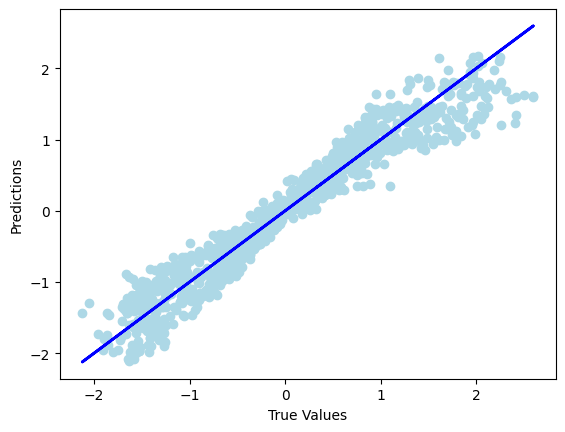

In [ ]:
# run linear regression
reg_kbest = LinearRegression().fit(X_train_kbest, y_train)

# train the model
reg_kbest.fit(X_train_kbest, y_train)

# make predictions on the test set
y_pred = reg_kbest.predict(X_test_kbest)

# do scatter plot
plt.scatter(y_test, y_pred, color='lightblue')
plt.plot(y_test, y_test, color='blue', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# evaluate model accuracy
from sklearn.metrics import mean_squared_error

accuracy_kbest = reg_kbest.score(X_test_kbest, y_test)
print("Accuracy:", accuracy_kbest)

mse_kbest = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_kbest)

Accuracy: 0.9303207307201893
Mean Squared Error: 0.06948068302215835


### P-values

In [ ]:
# Import P-value
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

# Perform P-value
selector_pvalue = SelectFromModel(LinearRegression())
X_train_pvalue = selector_pvalue.fit_transform(X_train, y_train)
X_test_pvalue = selector_pvalue.transform(X_test)

# Features selected by P-value
selected_features = selector_pvalue.get_support()
selected_feature_names = X.columns[selected_features]
print("Selected features from P-value:", list(selected_feature_names))

Selected features from P-value: ['C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'RH', 'AH']


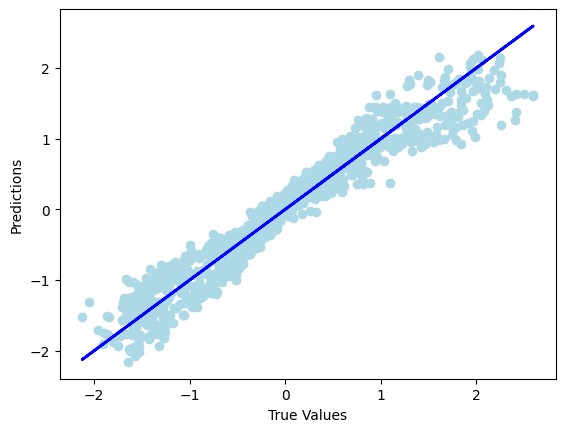

In [ ]:
# run linear regression
reg_pvalue = LinearRegression().fit(X_train_pvalue, y_train)

# train the model
reg_pvalue.fit(X_train_pvalue, y_train)

# make predictions on the test set
y_pred = reg_pvalue.predict(X_test_pvalue)

# do scatter plot
plt.scatter(y_test, y_pred, color='lightblue')
plt.plot(y_test, y_test, color='blue', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# evaluate model accuracy
from sklearn.metrics import mean_squared_error

accuracy_pvalue = reg_pvalue.score(X_test_pvalue, y_test)
print("Accuracy:", accuracy_pvalue)

mse_pvalue = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_pvalue)

Accuracy: 0.9330393970033687
Mean Squared Error: 0.0667697649511598


### LASSO

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Perform Lasso
selector_lasso = SelectFromModel(Lasso(alpha=0.1)) # running alpha on this value returns 3 features.
X_train_lasso = selector_lasso.fit_transform(X_train, y_train)
X_test_lasso = selector_lasso.transform(X_test)

# Features selected by Lasso
selected_features = selector_lasso.get_support()
selected_feature_names = X.columns[selected_features]
print("Selected features from Lasso:", list(selected_feature_names))

Selected features from Lasso: ['PT08.S4(NO2)', 'RH', 'AH']


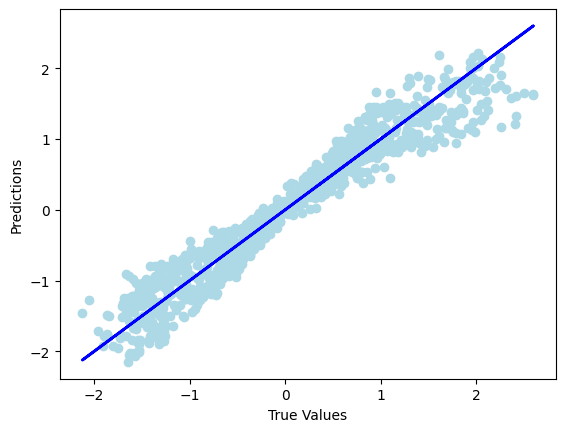

In [ ]:
# run linear regression
reg_lasso = LinearRegression().fit(X_train_lasso, y_train)

# train the model
reg_lasso.fit(X_train_lasso, y_train)

# make predictions on the test set
y_pred = reg_lasso.predict(X_test_lasso)

# do scatter plot
plt.scatter(y_test, y_pred, color='lightblue')
plt.plot(y_test, y_test, color='blue', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# model accuracy
accuracy_lasso = reg_lasso.score(X_test_lasso, y_test)
print("Accuracy:", accuracy_lasso)

mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_lasso)

Accuracy: 0.9297966790902118
Mean Squared Error: 0.07000324110243178


### PCA

In [ ]:
# Perform PCA
from sklearn.decomposition import PCA

# Create a PCA object with components
pca = PCA(n_components=5)

# Fit and transform the data
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)

In [ ]:
# Create DataFrame with Principal Components
df_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca['target'] = y
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,target
0,5.453092,0.139415,-0.717346,1.046397,-1.570696,-0.085173
1,2.832798,-0.099227,-0.914519,0.150973,-1.661125,0.236561
2,1.638909,-0.024329,-1.277107,0.049125,-1.505529,0.558295
3,1.427055,0.116744,-1.260107,0.019143,-1.434360,0.601193
4,1.337774,0.173107,-1.592406,0.234504,-1.347114,0.708437


In [ ]:
# calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.60064307 0.18982081 0.1118428  0.02851295 0.01923503]


In [ ]:
# demonstrate principal components weights
component_weights = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print(component_weights)

       CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
PC1  0.360759     0.361819  0.367351       0.371161  0.298242     -0.347425   
PC2 -0.046686     0.023083  0.106438       0.103292 -0.333658      0.013120   
PC3 -0.067656     0.116490 -0.172331      -0.175916  0.211848     -0.149116   
PC4  0.421757    -0.135675  0.291751       0.162640  0.163837      0.614676   
PC5  0.192330    -0.377519 -0.004006       0.013150  0.611118     -0.109388   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        RH        AH  
PC1  0.256426      0.241136     0.357309  0.007447  0.070392  
PC2 -0.437294      0.513869    -0.060482  0.027780  0.635667  
PC3 -0.134658     -0.137865     0.129197  0.881022  0.155122  
PC4 -0.350013      0.107642    -0.061654  0.231453 -0.309849  
PC5  0.023486     -0.146554    -0.441314 -0.132410  0.447826  


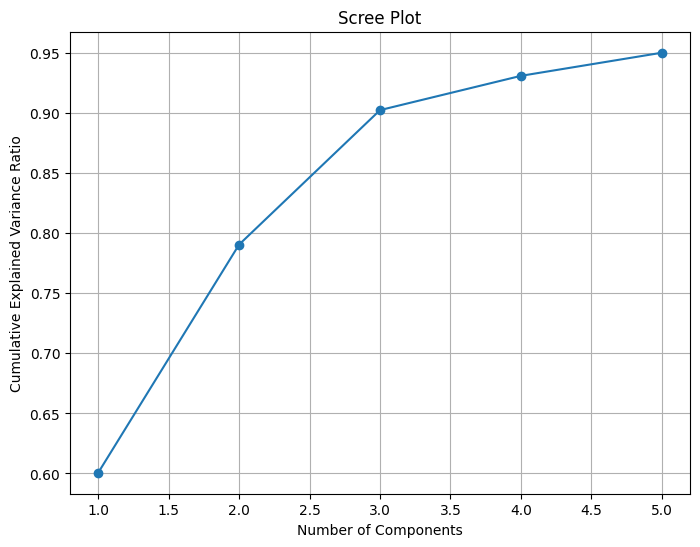

In [ ]:
# create scree plot
## cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

Now we can evaluate the different relationships between the principal components, them being 5 as, according to the scree plot, 5 PCAs is an appropriate number to fit the data.

#### PC1 vs PC2

<ipython-input-187-e2c326b0b0a3>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


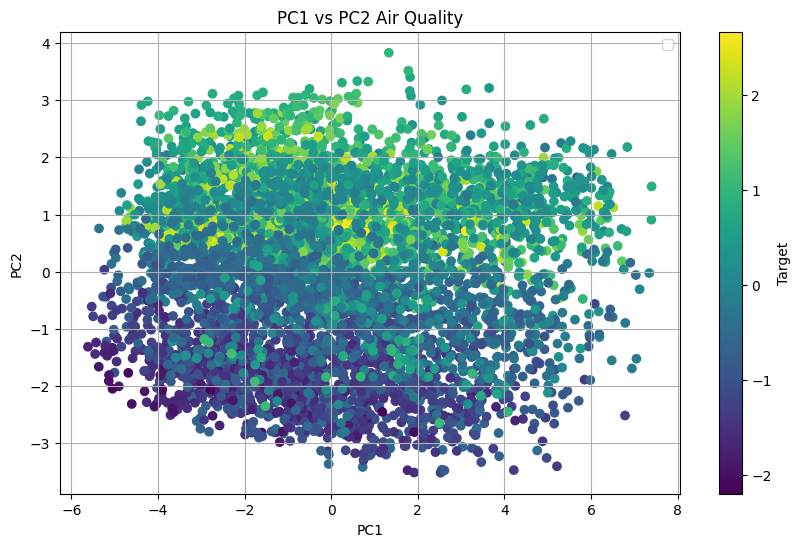

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 Air Quality')
plt.colorbar(label='Target')
plt.grid(True)
plt.legend()
plt.show()

Through this analysis, possible clusters can be made based on the concentration of similar target data upon certain points. This can be seen through the color of the value points, as they are relatively clustered together. The same can be seen in the other relationships demonstrated below.

However, all those relationships do not show a very clear division of clusters, demonstrating that PCA feature selection might not be the best option for this analysis.

#### PC4 vs PC5

<ipython-input-189-a0e670b97782>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


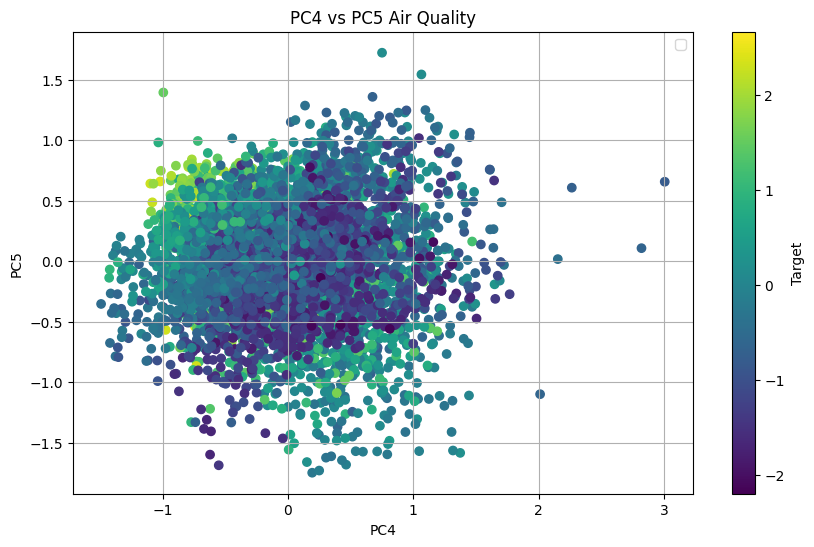

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC4'], df_pca['PC5'], c=df_pca['target'], cmap='viridis')
plt.xlabel('PC4')
plt.ylabel('PC5')
plt.title('PC4 vs PC5 Air Quality')
plt.colorbar(label='Target')
plt.grid(True)
plt.legend()
plt.show()

#### PC1 vs PC5

<ipython-input-190-9097c167874d>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


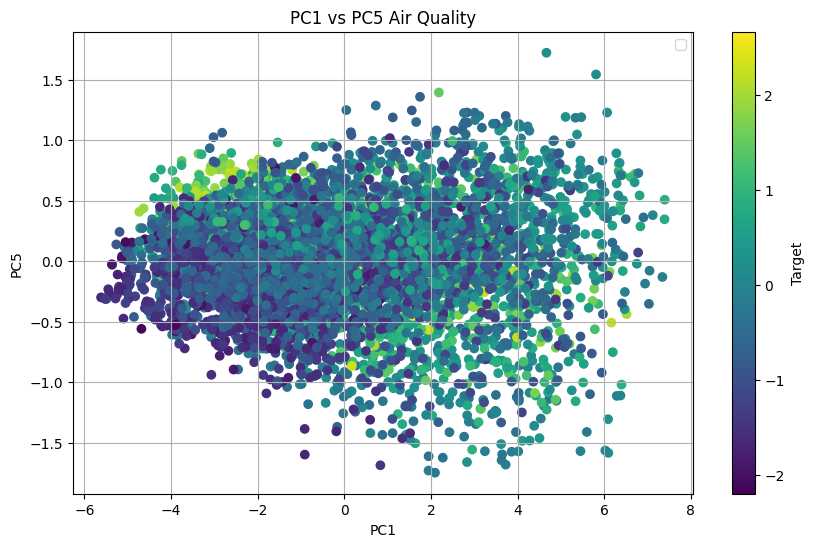

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC5'], c=df_pca['target'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.title('PC1 vs PC5 Air Quality')
plt.colorbar(label='Target')
plt.grid(True)
plt.legend()
plt.show()

#### PC2 vs PC2

<ipython-input-188-31ac9a2e4b2d>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


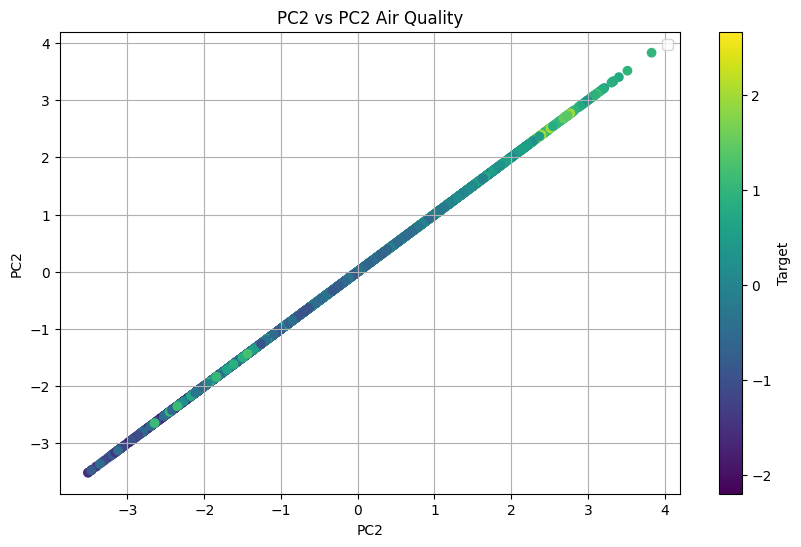

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC2'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC2')
plt.title('PC2 vs PC2 Air Quality')
plt.colorbar(label='Target')
plt.grid(True)
plt.legend()
plt.show()

As this is a plot made by the component against itself, there is a "perfect" direct relationship.

Text(0, 0.5, 'Predictions')

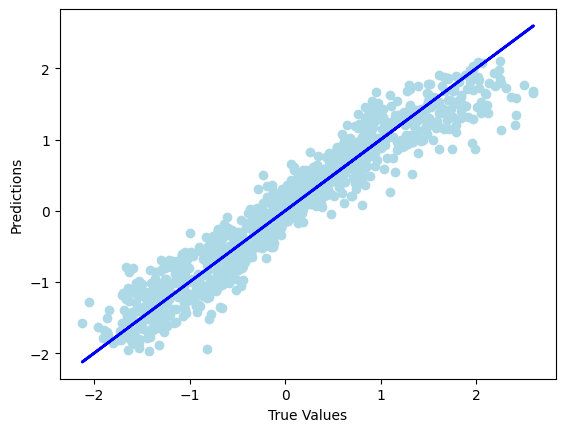

In [ ]:
# run linear regression
reg_pca = LinearRegression().fit(X_train_pca, y)

# train the model
reg_pca.fit(X_train_pca, y)

# make predictions on the test set
y_pred = reg_pca.predict(X_test_pca)

# do scatter plot
plt.scatter(y_test, y_pred, color='lightblue')
plt.plot(y_test, y_test, color='blue', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
# evaluate model accuracy
from sklearn.metrics import mean_squared_error

accuracy_pca = reg_pca.score(X_test_pca, y_test)
print("Accuracy:", accuracy_pca)

mse_pca = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_pca)

Accuracy: 0.919326090114926
Mean Squared Error: 0.08044398884801597


## Evaluating Model Accuracies

In [ ]:
# after performing multiple feature selection techniques, we print again
# the evaluations previosuly made, that is,
# if there was a model ran on them that performed the best.

In [ ]:
print("First Linear Regression (No Feature Selection):")
print("Accuracy:", accuracy_first)
print("MSE:", mse_first)

print("\nKBest: ")
print("Accuracy:", accuracy_kbest)
print("MSE:", mse_kbest)

print("\nLASSO:")
print("Accuracy:", accuracy_lasso)
print("MSE:", mse_lasso)

print("\nPCA:")
print("Accuracy:", accuracy_pca)
print("MSE:", mse_pca)

print("\nP-value:")
print("Accuracy:", accuracy_pvalue)
print("MSE:", mse_pvalue)

First Linear Regression (No Feature Selection):
Accuracy: 0.9360558098734012
MSE: 0.07000324110243178

KBest: 
Accuracy: 0.9303207307201893
MSE: 0.07000324110243178

LASSO:
Accuracy: 0.9297966790902118
MSE: 0.07000324110243178

PCA:
Accuracy: 0.919326090114926
MSE: 0.08044398884801597

P-value:
Accuracy: 0.9330393970033687
MSE: 0.0667697649511598


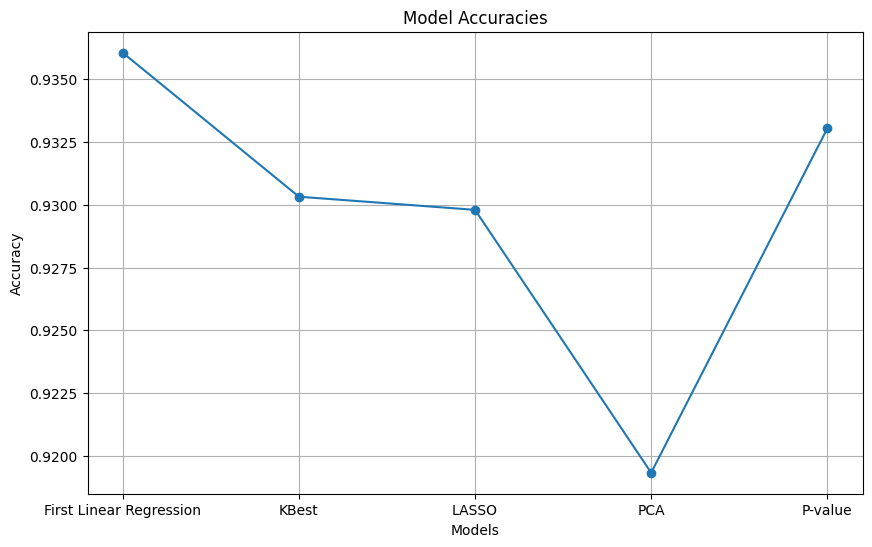

In [ ]:
# make plot for each model and tehir corresponding accuracy
models = ['First Linear Regression', 'KBest', 'LASSO', 'PCA', 'P-value']
accuracies = [accuracy_first, accuracy_kbest, accuracy_lasso, accuracy_pca, accuracy_pvalue]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(True)
plt.show()


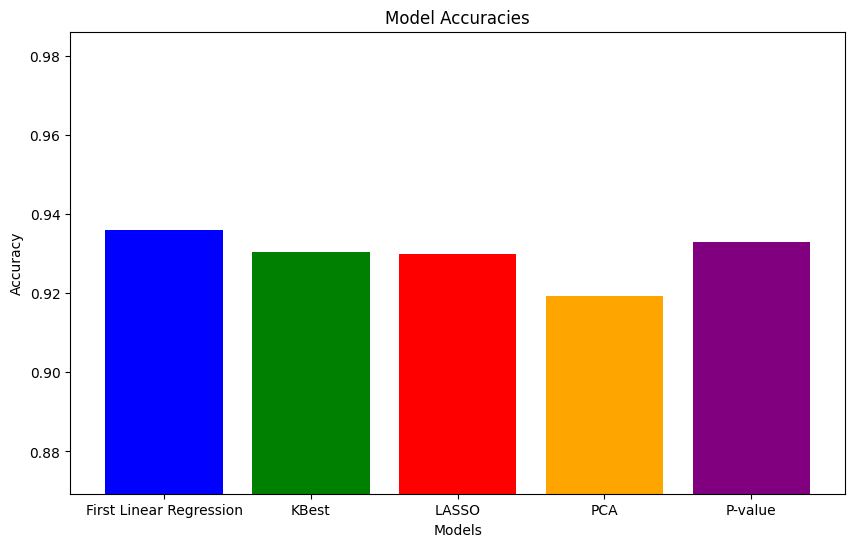

In [ ]:
# Now create bar plot
# Create a bar plot

colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Adjust plot scales

import numpy as np

min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)
plt.ylim(min_accuracy - 0.05, max_accuracy + 0.05)

plt.show()

# Conclusions

1. All the models work fairly well, however the one that performed best was the First Linear Regression, being the one where no feature selection was made.
  

*   This means that, despite using feature selection to see the best performing variables, the model can make better predictions when having all the information available. In this case, having all the gases and their sensors, as well as other aspects like Humidity, make better predictions over the changes in Temperature.

2. Gases perform differently over time


*   The univariate analysis demonstrated that gases can spike their concentration or lower it depending on cenrtain times of the year, and further research on the city's environment is necessary to determine the exact reasoning for each instance.


3. Sensors can work on different gases


*   Despite having one sensor to detect each gas, it was visible through Bivariate Analysis that sensors can work on different gasses and not work for the gasses that they were built on.
* Analysing the technology and how it is used is key to make usre all sensors work appropriately and in the correspondent gasses.

Overall, more research would be benefitial in order to correctly use the model and interpret its predictions, especially when it comes to the environment of the city and other contextual data that might indicate the causes of the gass concentrations and their sensor detections.








